# House Price Prediction 

In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#ingnore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file

data= pd.read_csv('train.csv') 

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.shape

(1460, 81)

In [6]:
#cheching missing value

no_of_missing_values=data.isnull().sum().sort_values(ascending=False).head(20)
no_of_missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [7]:
#percentage of missing values

percent= (no_of_missing_values / data.shape[0])*100

#pandas data frame with number of missing data and percentage of missing values

missing_data=pd.concat([no_of_missing_values,percent], axis=1 , keys=['No. of missing value','Percentage'])
missing_data

,No. of missing value,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [8]:
#NA gven catagorical columns which has to be filled with given value

Na_with_val=["Alley","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
            "BsmtQual","Fence","FireplaceQu","GarageCond","GarageFinish",
             "GarageQual","GarageType","PoolQC","MiscFeature"]

In [9]:
#fill "None" with the columns with given value 

for i in Na_with_val:
    data[i].fillna('None', inplace= True)

In [10]:
#missing data percentage
# 5 columns have missing null values 

no_of_missing_values=data.isnull().sum().sort_values(ascending=False).head(20)
percent= (no_of_missing_values / data.shape[0])*100
missing_data=pd.concat([no_of_missing_values,percent], axis=1 , keys=['No. of missing value','Percentage'])
missing_data.head() 

,No. of missing value,Percentage
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


In [11]:
data['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [12]:
#drop column has more missing values

data.drop('LotFrontage',axis=1,inplace=True)

In [13]:
#missing data percentage

no_of_missing_values=data.isnull().sum().sort_values(ascending=False).head(20)
percent= (no_of_missing_values / data.shape[0])*100
missing_data=pd.concat([no_of_missing_values,percent], axis=1 , keys=['No. of missing value','Percentage'])
missing_data.head() 

,No. of missing value,Percentage
GarageYrBlt,81,5.547945
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000


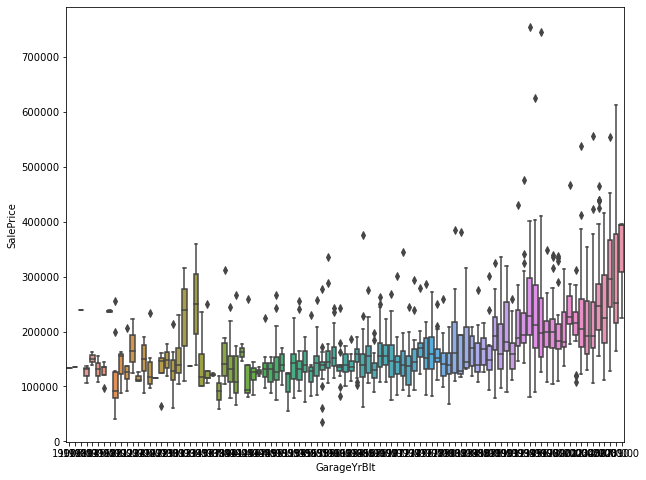

In [14]:
#boxplot to check outlies  MasVnrType

plt.figure(figsize=(10,8))
df=pd.concat([data["SalePrice"], data['GarageYrBlt']], axis=1)
sns.boxplot(x='GarageYrBlt',y='SalePrice',data=df)

In [15]:
data['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [16]:
data['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1460, dtype: object

In [17]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median,inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median, inplace=True)
data['MasVnrType'].fillna('None', inplace=True)

In [18]:
#missing data percentage

no_of_missing_values=data.isnull().sum().sort_values(ascending=False).head(20)
percent= (no_of_missing_values / data.shape[0])*100
missing_data=pd.concat([no_of_missing_values,percent], axis=1 , keys=['No. of missing value','Percentage'])
missing_data.head() 

,No. of missing value,Percentage
Electrical,1,0.068493
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [19]:
data.dropna(inplace=True)

In [20]:
#missing data percentage

no_of_missing_values=data.isnull().sum().sort_values(ascending=False).head(20)
percent= (no_of_missing_values / data.shape[0])*100
missing_data=pd.concat([no_of_missing_values,percent], axis=1 , keys=['No. of missing value','Percentage'])
missing_data

,No. of missing value,Percentage
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


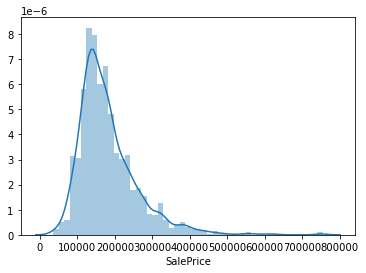

In [21]:
#distplot

sns.distplot(data['SalePrice'])

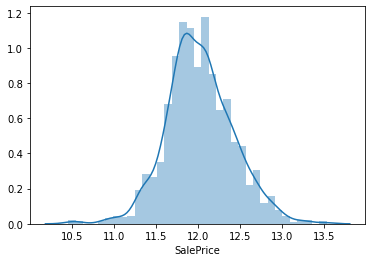

In [22]:
sns.distplot(np.log(data["SalePrice"]))

In [23]:
data["TransformedPrice"]=np.log(data["SalePrice"])

# Data Preparation 

In [24]:
data.dtypes

Id                    int64
MSSubClass            int64
MSZoning             object
LotArea               int64
Street               object
                     ...   
YrSold                int64
SaleType             object
SaleCondition        object
SalePrice             int64
TransformedPrice    float64
Length: 81, dtype: object

In [25]:
#select numeric column only

num_val=data.select_dtypes(include=['int64','float64'])
num_val.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'TransformedPrice'],
      dtype='object')

In [26]:
#select catagerical columns 

cat_val= data.select_dtypes(include=['object'])
cat_val.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
#since the categorical columns are in order, the can be assigned numerical values 

data['MSZoning'].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [28]:
cat_val.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


In [29]:
#converting categorical columns into numeric 

for i in cat_val:
    feature_set= set(data[i])
    for j in feature_set:
        feature_list=list(feature_set)
        data.loc[data[i]==j,i]=feature_list.index(j)

In [30]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,1,8450,1,2,1,2,0,2,...,1,3,0,0,2,2008,8,2,208500,12.247694
1,2,20,1,9600,1,2,1,2,0,1,...,1,3,0,0,5,2007,8,2,181500,12.109011
2,3,60,1,11250,1,2,3,2,0,2,...,1,3,0,0,9,2008,8,2,223500,12.317167
3,4,70,1,9550,1,2,3,2,0,0,...,1,3,0,0,2,2006,8,1,140000,11.849398
4,5,60,1,14260,1,2,3,2,0,1,...,1,3,0,0,12,2008,8,2,250000,12.429216


In [31]:
#feature columns(X)
 
X=data.drop(["Id","SalePrice","TransformedPrice"],axis=1)

In [32]:
#target variable (y)

y=data["TransformedPrice"]

# Model Building

In [33]:
# train test data split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X,y, test_size=0.3, random_state=100)

In [34]:
#regularization

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [35]:
#set alpha 

params={"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

In [36]:
#lasso regression

lasso=Lasso()
folds=5
model_cv=GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring="neg_mean_absolute_error",
                      return_train_score=True,
                      cv=folds,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results["param_alpha"]=cv_results["param_alpha"].astype("float32")

In [47]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.074241,0.089750,0.01300,0.007969,0.0001,{'alpha': 0.0001},-0.084730,-0.104800,-0.099773,-0.097101,...,-0.098022,0.007196,2,-0.087105,-0.083042,-0.078313,-0.086161,-0.083717,-0.083668,0.003069
1,0.027360,0.007231,0.00300,0.002915,0.0010,{'alpha': 0.001},-0.087442,-0.101127,-0.099344,-0.097158,...,-0.097716,0.005545,1,-0.088303,-0.084454,-0.079163,-0.086530,-0.085121,-0.084714,0.003073
2,0.020220,0.007013,0.00724,0.007066,0.0100,{'alpha': 0.01},-0.099691,-0.102390,-0.101827,-0.098179,...,-0.099006,0.003385,3,-0.095400,-0.092853,-0.088628,-0.088596,-0.093659,-0.091827,0.002751
3,0.044320,0.012781,0.00724,0.007066,0.0500,{'alpha': 0.05},-0.101609,-0.115656,-0.119589,-0.120060,...,-0.111418,0.008741,4,-0.107747,-0.105596,-0.101875,-0.102905,-0.107102,-0.105045,0.002300
4,0.041940,0.006340,0.00936,0.007642,0.1000,{'alpha': 0.1},-0.105096,-0.124237,-0.127185,-0.124537,...,-0.117791,0.009320,9,-0.116937,-0.112175,-0.107882,-0.107012,-0.115593,-0.111920,0.003978


In [40]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha           float32
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

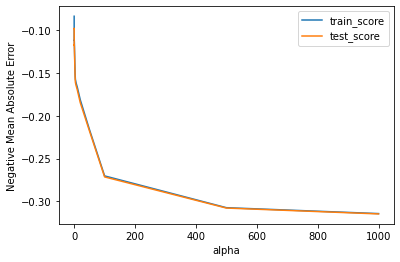

In [43]:
#plot for param alpha and mean train score

plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(["train_score","test_score"])
plt.show()

In [44]:
alpha=50
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=50)

In [45]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00,  4.02426915e-06,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.41724335e-04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.68173575e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [46]:
#Ridge Regression

ridge=Ridge()
folds=5
model_cv=GridSearchCV(estimator=ridge,
                      param_grid=params,
                      scoring="neg_mean_absolute_error",
                      return_train_score=True,
                      cv=folds,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results["param_alpha"]=cv_results["param_alpha"].astype("float32")

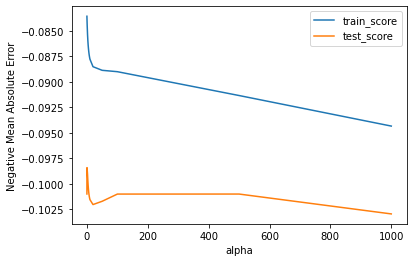

In [49]:
#plot for param alpha and mean train score

plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")
plt.legend(["train_score","test_score"])
plt.show()

In [51]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [52]:
ridge.coef_

array([-5.85595559e-04, -8.53451095e-03,  2.16630330e-06,  5.85544605e-02,
        9.01759228e-03,  8.76145013e-03, -2.96682500e-02, -1.45194839e-02,
        2.40928108e-03, -4.46962578e-03,  1.47966445e-03, -8.14992160e-04,
       -5.43182544e-02, -4.51577268e-03,  1.20929279e-03,  6.50919240e-02,
        4.76892456e-02,  2.43744521e-03,  8.85648670e-04,  1.98359985e-02,
       -1.88790184e-02, -2.72636553e-04,  1.40515409e-03,  3.90186827e-03,
        4.33561721e-05,  3.73589762e-03, -1.77136217e-02, -9.02930832e-03,
       -1.05096977e-02, -1.02964734e-02,  3.73040258e-03, -6.97005832e-03,
        2.12911479e-05,  1.23431346e-02,  4.33736799e-05,  5.28262983e-06,
        6.99474596e-05, -2.34825262e-03, -1.13331906e-02, -4.09752580e-02,
       -3.06058511e-03,  3.91066152e-05,  6.52435213e-05,  4.81681242e-05,
        1.52518269e-04,  5.57317879e-02,  1.80067845e-02,  4.15461297e-02,
        2.60705740e-02,  3.66508577e-03, -3.90815160e-02,  2.25099143e-02,
        6.44886232e-03,  

In [53]:
ridge_pred=ridge.predict(X_test)

In [54]:
ridge_pred

array([12.33087055, 11.98811625, 11.67605554, 12.79996667, 12.41942735,
       11.91333107, 11.7040279 , 11.71478496, 12.65298499, 11.88160463,
       12.08314893, 12.35392904, 11.72042768, 11.6170517 , 12.0520956 ,
       11.89484955, 12.79856947, 12.19421093, 12.31442942, 11.60718203,
       11.61396466, 12.13658792, 11.66884505, 12.09718505, 11.86342237,
       11.66911981, 11.84795278, 12.46919054, 11.52383505, 12.19627945,
       12.19806597, 12.90606748, 12.69730458, 11.76168618, 12.05213915,
       11.74263442, 12.11685505, 11.74113917, 12.31782635, 11.97263034,
       11.37417413, 12.15207841, 11.6877432 , 11.41043692, 11.98299565,
       11.58993146, 12.07774927, 11.23871472, 12.68062408, 12.26793413,
       13.00836099, 11.76551014, 12.63317631, 12.14756776, 11.94456547,
       10.82980491, 11.70668132, 12.64528803, 11.93482569, 12.07531438,
       12.56008233, 11.96297588, 11.77058645, 12.26726858, 11.75058877,
       12.4139931 , 12.13780338, 11.86238253, 12.27940852, 12.22

In [55]:
ridge.score(X_test, y_test)

0.7585632886326357

In [56]:
lasso.score(X_test, y_test)

0.515860156271025